# Ensemble Method for N= 3


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from time import time
from operator import itemgetter
from sklearn.svm import SVC
from sklearn import metrics

#### Get data
benign = pd.read_csv('dev1/benign_traffic.csv')
benign['class'] = 0

g_combo = pd.read_csv('dev1/gafgyt_attacks/combo.csv')
g_combo['class'] = 1
#print g_combo.columns.values

g_junk = pd.read_csv('dev1/gafgyt_attacks/junk.csv')
g_junk['class'] = 1
#print g_junk.columns.values

g_scan = pd.read_csv('dev1/gafgyt_attacks/scan.csv')
g_scan['class'] = 1
#print g_scan.columns.values

g_tcp = pd.read_csv('dev1/gafgyt_attacks/tcp.csv')
g_tcp['class'] = 1
#print g_tcp.columns.values

g_udp = pd.read_csv('dev1/gafgyt_attacks/udp.csv')
g_udp['class'] = 1
#print g_udp.columns.values

m_ack = pd.read_csv('dev1/mirai_attacks/ack.csv')
m_ack['class'] = 1
#print m_ack.columns.values

m_scan = pd.read_csv('dev1/mirai_attacks/scan.csv')
m_scan['class'] = 1
#print m_scan.columns.values

m_syn = pd.read_csv('dev1/mirai_attacks/syn.csv')
m_syn['class'] = 1
#print m_syn.columns.values

m_udp = pd.read_csv('dev1/mirai_attacks/udp.csv')
m_udp['class'] = 1
#print m_udp.columns.values

m_udpplain = pd.read_csv('dev1/mirai_attacks/udpplain.csv')
m_udpplain['class'] = 1
#print m_udpplain.columns.values

print("Data extraction : Success")



Data extraction : Success


In [2]:
malicious = pd.concat([g_combo, g_junk, g_scan, g_tcp,
                     g_udp, m_ack, m_scan, m_syn, m_udp, m_udpplain])

from sklearn.utils import shuffle
benign = shuffle(benign)
malicious = shuffle(malicious)

n = len(benign)
benignVal = benign[:int(n / 6)]
benignTest = benign[int(5 * n / 6):]
benignTrain = benign[int(n / 6):int(5 * n / 6)]

n = len(malicious)
maliciousVal = malicious[:int(n / 2)]
maliciousTest = malicious[int(n / 2):]

dataTest = pd.concat([benignTest, maliciousTest])
dataVal = pd.concat([benignVal, maliciousVal])

from sklearn.preprocessing import normalize


print(len(benignTrain))
print("Data Randomized")

l = list(benignTrain)
l.remove('class')

X = benignTrain[l]
y = benignTrain['class']
X = normalize(X)

Xval = dataVal[l]
yval = dataVal['class']
Xval = normalize(Xval)

XTest = dataTest[l]
yTest = dataTest['class']
XTest = normalize(XTest)




#print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))
#print(np.shape(dataVal), np.shape(benignTrain))


26930
Data Randomized


In [3]:
from keras.layers import Input, Dense
from keras.models import Model

N = 3   ### Number of autoencoders used.

enc_list = []

for i in range(N):
    # this is our input placeholder
    input_img = Input(shape=(115,))

    # "encoded" is the encoded representation of the input
    encoded = Dense(64, activation='relu')(input_img)
    encoded = Dense(32, activation='relu')(encoded)

    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(115, activation='sigmoid')(decoded)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

    enc_list.append(autoencoder)

# from sklearn.model_selection import StratifiedShuffleSplit
# data_split_obj = StratifiedShuffleSplit(n_splits=n, test_size=0.0)#, random_state=0)
# data_split = data_split_obj.get_n_splits(X_train, y_train)

data_split = np.array_split(benignTrain, N)
l = list(benignTrain)
l.remove('class')


for i in range(N):
    bT = data_split[i]
    X = bT[l]
    y = bT['class']
    X = normalize(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#, random_state=0)

    enc_list[i].fit(X_train, X_train,
                    epochs=30,
                    batch_size=1024,
                    shuffle=True,
                    validation_data=(X_test, X_test))

n = len(Xval)
ypredval = [[0 for _ in range(len(Xval))] for _ in range(N)]
import math

for i in range(N):
    ytemp = enc_list[i].predict(Xval)
    n = len(Xval)
    l = []

    for j in range(n):
        temp = metrics.mean_squared_error(Xval[j], ytemp[j]) ** 0.5
        ypredval[i][j] = temp






Using TensorFlow backend.


Train on 6283 samples, validate on 2694 samples
Epoch 1/30
6283/6283 [==============================] - 3s 419us/step - loss: 0.6899 - val_loss: 0.6855
Epoch 2/30
6283/6283 [==============================] - 0s 26us/step - loss: 0.6826 - val_loss: 0.6771
Epoch 3/30
6283/6283 [==============================] - 0s 27us/step - loss: 0.6731 - val_loss: 0.6651
Epoch 4/30
6283/6283 [==============================] - 0s 24us/step - loss: 0.6581 - val_loss: 0.6427
Epoch 5/30
6283/6283 [==============================] - 0s 25us/step - loss: 0.6273 - val_loss: 0.5901
Epoch 6/30
6283/6283 [==============================] - 0s 25us/step - loss: 0.5493 - val_loss: 0.4519
Epoch 7/30
6283/6283 [==============================] - 0s 25us/step - loss: 0.3698 - val_loss: 0.2428
Epoch 8/30
6283/6283 [==============================] - 0s 25us/step - loss: 0.2053 - val_loss: 0.1701
Epoch 9/30
6283/6283 [==============================] - 0s 26us/step - loss: 0.1635 - val_loss: 0.1555
Epoch 10/30
6283/6283 [=

6283/6283 [==============================] - 0s 18us/step - loss: 0.1423 - val_loss: 0.1423
Epoch 19/30
6283/6283 [==============================] - 0s 19us/step - loss: 0.1420 - val_loss: 0.1420
Epoch 20/30
6283/6283 [==============================] - 0s 20us/step - loss: 0.1417 - val_loss: 0.1418
Epoch 21/30
6283/6283 [==============================] - 0s 24us/step - loss: 0.1415 - val_loss: 0.1416
Epoch 22/30
6283/6283 [==============================] - 0s 22us/step - loss: 0.1413 - val_loss: 0.1414
Epoch 23/30
6283/6283 [==============================] - 0s 21us/step - loss: 0.1411 - val_loss: 0.1412
Epoch 24/30
6283/6283 [==============================] - 0s 22us/step - loss: 0.1409 - val_loss: 0.1410
Epoch 25/30
6283/6283 [==============================] - 0s 20us/step - loss: 0.1408 - val_loss: 0.1409
Epoch 26/30
6283/6283 [==============================] - 0s 19us/step - loss: 0.1406 - val_loss: 0.1407
Epoch 27/30
6283/6283 [==============================] - 0s 20us/step - loss

## Validation step to find optimal threshold

In [4]:
n = len(Xval)
ypred = [[0 for _ in range(len(Xval))] for _ in range(N)]
import math

for i in range(N):
    ytemp = enc_list[i].predict(Xval)
    n = len(Xval)
    #l = []

    for j in range(n):
        temp = metrics.mean_squared_error(Xval[j], ytemp[j]) ** 0.5
        ypred[i][j] = temp

In [5]:
l = []
ypredval = [0 for _ in range(len(Xval))]

for i in range(len(Xval)):
    m1 = -1 * np.inf
    m2 = np.inf
    for j in range(N):
        if m1 < ypred[j][i]:
            m1 = ypred[j][i]
        if m2 > ypred[j][i]:
            m2 = ypred[j][i]
    ypredval[i] = m1 - m2
    
    l.append((ypredval[i], yval.iloc[i])) #####################
    
np.shape(l)


(491107, 2)

## Plots for validation threshold

In [6]:

rmsedf = pd.DataFrame.from_records(l, columns=['rmse', 'class'])

rmsedf.to_csv("rmseValidation_Ensemble.csv")


# threshold calcn
rdf = rmsedf[rmsedf['class'] == 0]
threshold = rdf['rmse'].mean() +  2* rdf['rmse'].std()
print("threshold", threshold)

threshold 0.002920521824231653


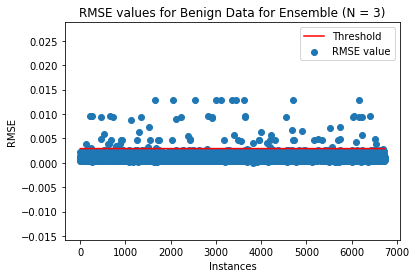

In [7]:
import matplotlib.pyplot as plt


##################### FOR VALIDATION

df2 = rmsedf[rmsedf['class'] == 0]
df2.to_csv("rmseValBenign_Ensemble.csv")
k = range(1, len(df2) + 1)
plt.scatter(range(1, len(df2) + 1), df2['rmse'])
#plt.plot(k, [df2['rmse'].mean() + 2 * df2['rmse'].std() for _ in k], "r")
plt.plot(k, [threshold  for _ in k], "r")
plt.xlabel("Instances")
plt.ylabel("RMSE")
plt.title("RMSE values for Benign Data for Ensemble (N = 3)")
plt.legend(["Threshold","RMSE value"])
plt.show()

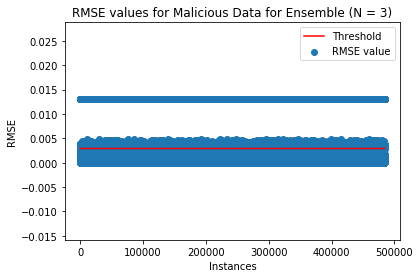

In [14]:
df3 = rmsedf[rmsedf['class'] == 1]
df3.to_csv("rmseValMal_Ensemble.csv")
k = range(1, len(df3) + 1)
plt.scatter(k, df3['rmse'])
#plt.plot(k, [df2['rmse'].mean() + 2 * df2['rmse'].std() for _ in k], "r")
plt.plot(k, [threshold  for _ in k], "r")
plt.xlabel("Instances")
plt.ylabel("RMSE")
plt.title("RMSE values for Malicious Data for Ensemble (N = 3)")
plt.legend(["Threshold","RMSE value"])
plt.show()


# Get results for Test Data using threshold

In [9]:

n = len(XTest)
ypred = [[0 for _ in range(len(XTest))] for _ in range(N)]
import math

for i in range(N):
    ytemp = enc_list[i].predict(XTest)
    n = len(XTest)
    for j in range(n):
        temp = metrics.mean_squared_error(XTest[j], ytemp[j]) ** 0.5
        ypred[i][j] = temp

ypredtest = [0 for _ in range(len(XTest))]

#for i in range(len(Xval)):
#    ypredval[i] = max(ypred[i][:])- min(ypred[i][:])
# ypredtest = enc_list[1].predict(000)

l2 = []

for i in range(len(XTest)):
    m1 = -1 * np.inf
    m2 = np.inf
    for j in range(N):
        if m1 < ypred[j][i]:
            m1 = ypred[j][i]
        if m2 > ypred[j][i]:
            m2 = ypred[j][i]
    ypredtest[i] = m1 - m2
    
    l2.append((ypredtest[i], yTest.iloc[i])) #####################
    
np.shape(l)

print(np.shape(ypredtest))


(491108,)


In [10]:
rmsedf2 = pd.DataFrame.from_records(l2, columns=['rmse', 'class'])

rmsedf2.to_csv("rmseTest_Ensemble_N.csv")
print(np.shape(XTest))
print(np.shape(l2))


(491108, 115)
(491108, 2)


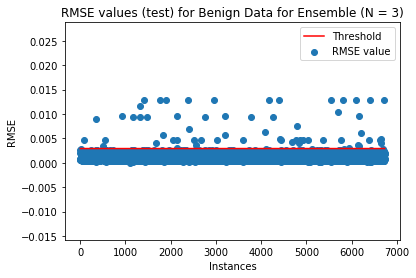

In [11]:
df5 = rmsedf2[rmsedf2['class'] == 0]
k = range(1, len(df5) + 1)
plt.scatter(k, df5['rmse'])
plt.plot(k,[threshold for _ in k],"r")                                      #### Same value  as threshold
#plt.plot(k, [df3['rmse'].mean() + 2 * df3['rmse'].std() for _ in k], "r")
plt.xlabel("Instances")
plt.ylabel("RMSE")
plt.title("RMSE values (test) for Benign Data for Ensemble (N = 3)")
plt.legend(["Threshold","RMSE value"])
plt.show()

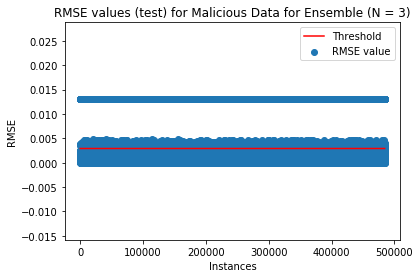

In [12]:
df6 = rmsedf2[rmsedf2['class'] == 1]
k = range(1, len(df6) + 1)
plt.scatter(k, df6['rmse'])
plt.plot(k,[threshold for _ in k],"r")                                      #### Same value  as threshold
#plt.plot(k, [df3['rmse'].mean() + 2 * df3['rmse'].std() for _ in k], "r")
plt.xlabel("Instances")
plt.ylabel("RMSE")
plt.title("RMSE values (test) for Malicious Data for Ensemble (N = 3)")
plt.legend(["Threshold","RMSE value"])
plt.show()

In [13]:

n = len(XTest)
m = [0 for _ in range(n)]
ct = 0
for i in range(n):
    if l2[i][0] < threshold:
        m[i] = 0
        ct += 1
    else:
        m[i] = 1

# print zip(l, yTest)

print(metrics.confusion_matrix(yTest, m))
print(metrics.classification_report(yTest, m))
print(ct)

[[  6673     60]
 [215223 269152]]
             precision    recall  f1-score   support

          0       0.03      0.99      0.06      6733
          1       1.00      0.56      0.71    484375

avg / total       0.99      0.56      0.71    491108

221896
